<a href="https://colab.research.google.com/github/Sanchell1o/Statistics-and-Data-Analysis/blob/main/stats_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Статистика для анализа данных**

## **Лабораторная работа №1**  
###**Расчет геометрической вероятности**


---


**Работу выполнили студенты :**
  - Бабич Александр Петрович, ИСУ: 412882,  Практический поток: 1.3  
  - Московкин Александр Николаевич, ИСУ: 472264,  Практический поток: 1.3  

### **Ход работы**

#### **Инициализация параметров**:
- Сторона квадрата: `a = 10`.
- Количество точек: `n = 150`.
- Радиусы вычисляются по формуле: $$
\
r_k = \frac{a}{k + 1}, \quad k = 0, \ldots, n-1
\
$$
#### **Функция для вычисления геометрической вероятности**:
Реализована функция, вычисляющая истинную вероятность `p` по формуле:
$$
p = \frac{\pi r^2}{4a^2}.
$$

#### **Генерация случайных точек**:
Сгенерированы случайные точки `(x, y)` в квадрате `Ω` с координатами `x, y ∈ [-a, a]`.

#### **Определение принадлежности точек к кругу**:
Для каждой точки проверено условие:
$$
x^2 + y^2 \leq r^2.
$$
Подсчитано количество точек, попавших в круг.

#### **Вычисление ошибки геометрической вероятности**:
Ошибка `ε(n)` вычислена как:
$$
ε(n) = |\hat{p}(n) - p|,
$$
где $$ |\hat{p}(n)|$$ — доля точек, попавших в круг.

#### **Построение графиков**:
* **График p̂(n)** — доля точек, попавших в круг  
  Этот график отображает, как меняется оценка вероятности попадания в круг по мере увеличения количества случайных точек. Он позволяет визуализировать, как с увеличением числа точек эта оценка приближается к истинной вероятности.

* **График ошибки ε(n) = |p̂(n) − p|**  
  На этом графике показана ошибка оценки вероятности на каждом шаге. Ошибка вычисляется как абсолютное значение разности между оцененной вероятностью и истинной вероятностью. График позволяет наблюдать, как ошибка изменяется с увеличением числа точек.

* **График точек в квадрате и круге**  
  Этот график визуализирует сгенерированные случайные точки, показывая, какие из них попали в круг, а какие остались за его пределами. Визуализация помогает наглядно оценить распределение точек внутри квадрата и круга.

* **График N(ε)** — количество точек для достижения заданной точности  
  График показывает, сколько точек требуется для достижения определенной точности (ε). Это позволяет понять, как быстро увеличивается точность с ростом числа точек.


### **Промежуточные результаты и их анализ**

- Оценка вероятности для каждого радиуса постепенно стабилизируется с увеличением количества точек, что подтверждает правильность расчётов и стабильность метода.
- Ошибка уменьшается с увеличением числа точек, что указывает на то, что метод Монте-Карло является сходимым.
- Для достижения высокой точности  необходимо большее количество точек, что является естественным для метода Монте-Карло.


### **Заключение**

В результате выполнения лабораторной работы можно сделать данные выводы:

1. **Эффективность метода Монте-Карло**: Метод Монте-Карло доказал свою эффективность в оценке геометрической вероятности попадания случайных точек в круг. С увеличением количества точек оценка вероятности стремится к истинному значению

2. **Зависимость ошибки от количества точек**: Ошибка уменьшается с ростом числа точек, что является характерным для методов Монте-Карло. Чем больше случайных точек, тем точнее становится результат.

3. **Практическая значимость**: Метод Монте-Карло является мощным инструментом для решения задач, в которых точное аналитическое решение невозможно или слишком трудоёмко. Этот метод применим не только для вычисления геометрических вероятностей, но и для более сложных задач в статистике и теории вероятностей.

Лабораторня работа показала, что метод Монте-Карло является удобным и эффективным способом приближённого вычисления геометрических вероятностей,


## **Сам код и основная часть работы**


In [1]:
import numpy as np # Ну, для чиселок
import matplotlib.pyplot as plt # Ну, для графиков

### **1. Выбор значений квадрата и количества точек**  

In [2]:
a = 10 # Ну пусть сторона квадрата 10
count_points = 150 # Пусть точек 150

### **2. Выбор значений радиуса**  

Радиусы задаются по формуле:
$$
\
r_k = \frac{a}{k + 1}, \quad k = 0, \ldots, n-1
\
$$

In [3]:
radius = np.array([a / (k + 1) for k in range(5)], dtype=np.float64)

In [4]:
radius # Выведем полученные радиусы

array([10.        ,  5.        ,  3.33333333,  2.5       ,  2.        ])

#### 2.(a) Истинная геометрическая вероятность

Истинная геометрическая вероятность вычисляется по формуле:

$$
P(A) = \frac{\pi \cdot r^2}{(2a)^2}
$$



In [5]:
true_probabilities = {
    r: (np.pi * r**2) / (4 * a**2) for r in radius
}

#### 2.(b) Генерация случайных точек и определение их принадлежности кругу

#### Cгенерировали точки с помощью псевдорандомного генератора

In [6]:
rng = np.random.default_rng(42) # «Автостопом по Галактике» хыхыхы
x_points = rng.uniform(-a, a, count_points) # Координаты по оси X
y_points = rng.uniform(-a, a, count_points) # Координаты по оси Y

In [7]:
x_points # Посмотрим че там

array([ 5.47912097, -1.2224312 ,  7.1719584 ,  3.94736058, -8.11645304,
        9.51244703,  5.22279404,  5.72128611, -7.43772735, -0.99228124,
       -2.58403952,  8.53529978,  2.8773024 ,  6.45523227, -1.13171602,
       -5.45522556,  1.09169574, -8.72365488,  6.55262344,  2.63328798,
        5.1617548 , -2.90948064,  9.41396049,  7.86242243,  5.56766994,
       -6.10722584, -0.66557993, -9.12392468, -6.91421016,  3.66097906,
        4.89524312,  9.35019465, -3.48349284, -2.59080588, -0.60888377,
       -6.21057282, -7.40156989, -0.48590148, -5.46181302,  3.39627989,
       -1.25696162,  6.65356392,  4.00530204, -3.75266717,  6.64519603,
        6.09528715, -2.25043242, -4.23343792,  3.64991008, -7.20495033,
       -6.00183595, -9.8527546 ,  5.73848755,  3.29701713,  4.10330757,
        5.61458062, -0.82168449,  1.37482392, -7.20406004, -7.70939853,
        3.36805924, -0.57807588,  1.30472213,  5.29997715,  2.6943664 ,
        1.07158801,  1.18414321, -3.92099804, -9.38364331, -1.26

In [8]:
y_points # Посмотрим че там х2

array([ 6.52583848,  7.92321544, -7.19501822,  1.08072287, -7.82848518,
        3.44480186, -4.37532432,  3.18845269,  4.53989229,  5.37294984,
       -7.84518108,  8.3202369 , -5.39572018, -9.25174888,  1.09704939,
       -2.58155432,  6.59579486,  6.16502944, -3.65722214,  9.0579879 ,
       -4.18164324,  0.30114258, -4.88069819,  8.7208714 , -6.70784365,
       -9.10178761, -1.2980588 ,  9.84751128,  7.83354533,  4.97216039,
        7.81584982,  7.86893279,  0.37716721, -3.68141896,  5.44024864,
        3.23322526, -2.52684542, -8.11066664,  4.93579223, -4.75078968,
        8.73626301, -5.1805885 , -7.54484135,  6.62225344, -6.93431367,
       -6.41463384,  1.98765583,  7.49124082, -6.07130669, -3.79352654,
        5.54809676,  9.43652852,  0.01482372, -7.12204995, -9.72127425,
       -5.4068794 , -7.36355564,  3.55317347, -7.56334991,  0.12659863,
        3.88524871,  1.62233218, -6.00448697,  6.08249052,  4.30814259,
        4.77968008, -7.37884497, -7.52492393,  8.55125102, -2.04

#### Определили принадлежность их к кругу

**Написали функцию попадают ли наши точки в круг:**

Функция проверяет, попала ли точка в круг, исходя из её расстояния от центра. Для этого используется квадрат расстояния от точки до центра, чтобы избежать вычислений с квадратными корнями. Если квадрат расстояния меньше или равен квадрату радиуса круга, то точка считается попавшей в круг.

In [9]:
def check_points(distances, radius):
    return distances <= radius

**Напиcали функцию, которая считает вероятность точки в круге:**

Функция вычисляет вероятность попадания точки в круг на каждом шаге эксперимента. Для каждого шага вероятность оценивается как отношение числа точек, попавших в круг, к общему количеству точек на данном шаге.

In [10]:
def calculate_estimated_probability(in_circle, count_points):
    return np.cumsum(in_circle) / np.arange(1, count_points + 1)

**Написали функцию вычисления ошибки:**

 Функция вычисляет ошибку на каждом шаге эксперимента, сравнивая текущую оценку вероятности с истинной вероятностью попадания точки в круг. Ошибка определяется как абсолютная разница между оценочной вероятностью и истинной вероятностью. Это позволяет отслеживать, насколько точна оценка вероятности с увеличением количества точек.

In [11]:
def calculate_errors(estimated_probabilities, true_probability):
    return np.abs(estimated_probabilities - true_probability)

### **3. Построим графики**  


#### **3.1 Графики №1**


*   График p_hat(n) — доля точек, попавших в круг
*   График ошибки ε(n) = |p̂(n) − p|
*   График точек в квадрате и круге






In [12]:
def plot_for_radius(r, true_probability, x_points, y_points, num_points):

    # 1. Вычисление расстояний от каждой точки до центра
    distances = np.sqrt(x_points**2 + y_points**2)

    # 2. Проверка, попала ли точка в круг
    in_circle = check_points(distances, r)

    # 3. Расчёт оценок вероятности попадания в круг на каждом шаге
    estimated_probabilities = calculate_estimated_probability(in_circle, num_points)

    # 4. Расчёт ошибки на каждом шаге
    errors = calculate_errors(estimated_probabilities, true_probability)

    plt.figure(figsize=(18, 6))

    # 5. График 1: Оценка вероятности попадания в круг (p̂(n))
    plt.subplot(2, 4, 1)
    plt.plot(np.arange(1, num_points + 1), estimated_probabilities, label=r'$\hat{p}(n)$', color='#1f77b4', linewidth=2)
    plt.axhline(true_probability, color='red', linestyle='--', label=f'Истинная p = {true_probability:.4f}')
    plt.title(f'$\hat{{p}}(n)$ для r={r:.2f}', fontsize=12)
    plt.xlabel('Количество точек', fontsize=10)
    plt.ylabel(r'$\hat{p}(n)$', fontsize=10)
    plt.legend(fontsize=8)
    plt.grid(True)

    # 6. График 2: Ошибка ε(n) = |p̂(n) − p|
    plt.subplot(2, 4, 2)
    plt.plot(np.arange(1, num_points + 1), errors, label=r'$\epsilon(n)$', color='#d62728', linewidth=2)
    plt.title(f'$\epsilon(n)$ для r={r:.2f}', fontsize=12)
    plt.xlabel('Количество точек ', fontsize=10)
    plt.ylabel(r'$\epsilon(n)$', fontsize=10)
    plt.legend(fontsize=8)
    plt.grid(True)

    # 7. График 3: Визуализация точек в квадрате и круге
    plt.subplot(2, 4, 3)
    plt.scatter(x_points[in_circle], y_points[in_circle], color='blue', label='В круге', s=5)
    plt.scatter(x_points[~in_circle], y_points[~in_circle], color='red', label='Вне круга', s=5)

    circle = plt.Circle((0, 0), r, color='blue', fill=False, linestyle='--', linewidth=2)

    square = plt.Rectangle((-a, -a), 2*a, 2*a, color='red', fill=False, linestyle='--', linewidth=2)

    plt.gca().add_patch(circle)
    plt.gca().add_patch(square)

    plt.title(f'Точки в квадрате и круге (r={r:.2f})')
    plt.xlim(-a, a)
    plt.ylim(-a, a)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.gca().set_aspect('equal', adjustable='box')

    plt.tight_layout()

    plt.show()


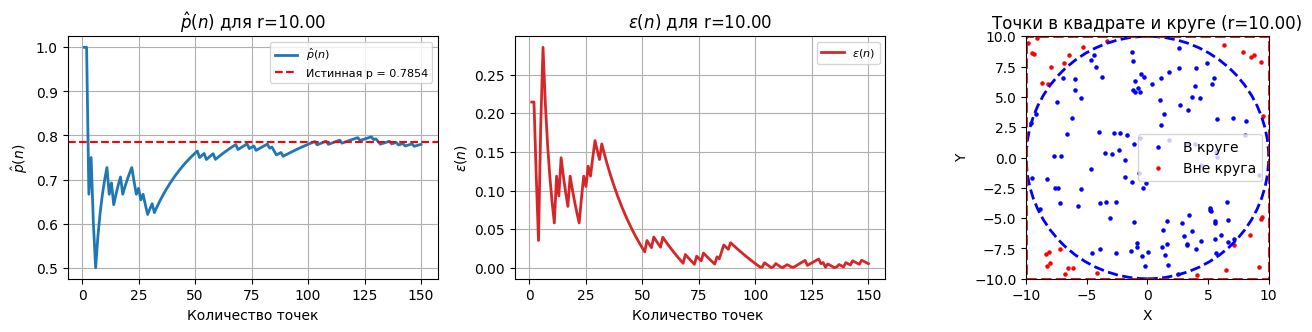

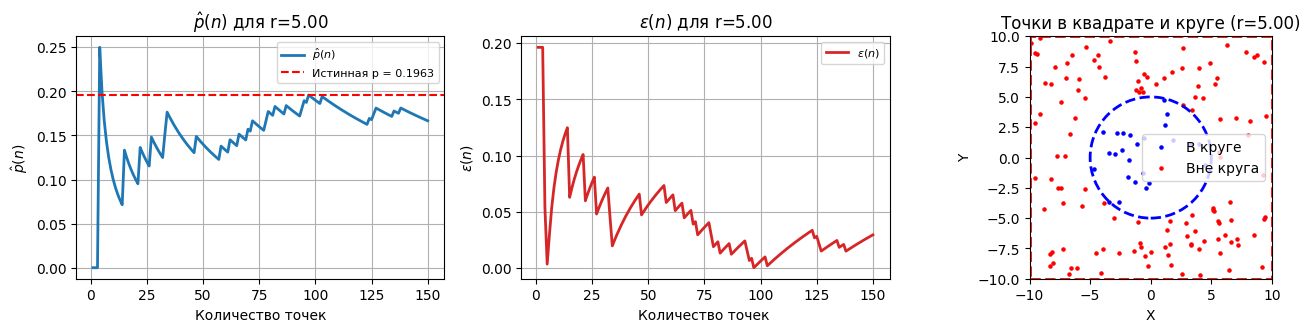

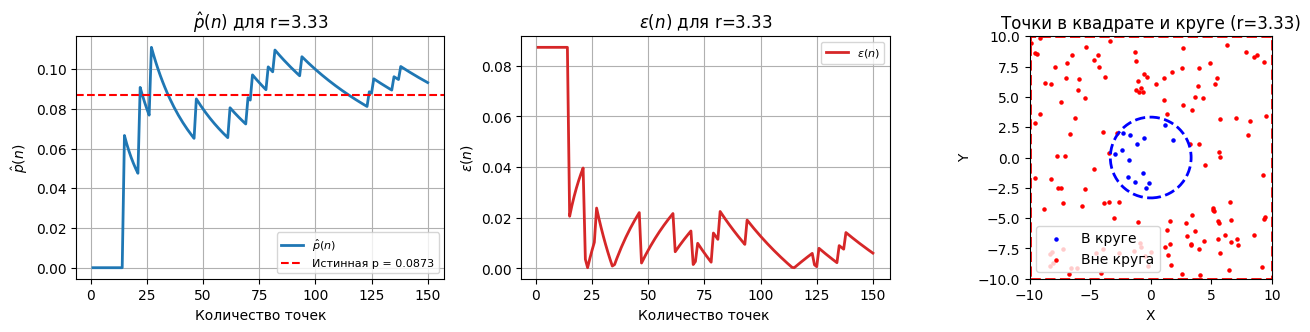

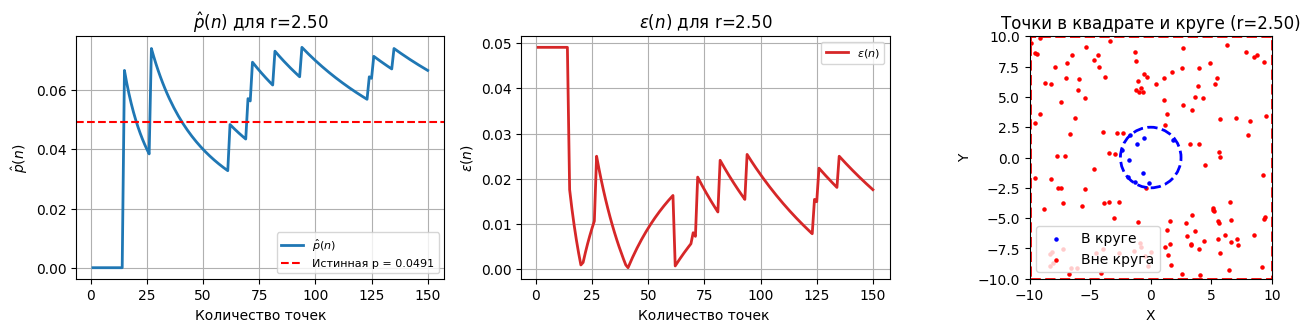

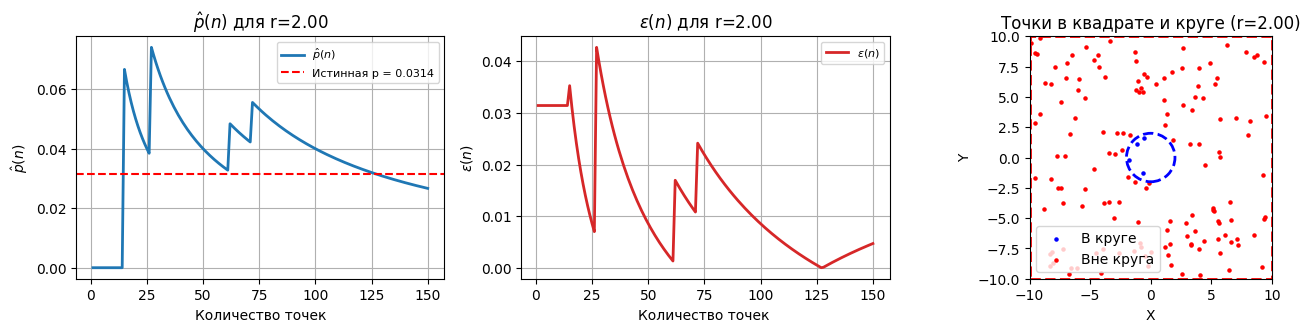

In [13]:
for r in radius:
     true_probability = true_probabilities[r]
     plot_for_radius(r, true_probability, x_points, y_points, count_points)

#### **3.2 Графики №2**


*  Графики N(ε)






In [14]:
def plot_erors(r, true_probability, x_points, y_points, num_points):

    # 1. Вычисление расстояний от каждой точки до центра
    distances = np.sqrt(x_points**2 + y_points**2)

    # 2. Проверка, попала ли точка в круг
    in_circle = check_points(distances, r)

    # 3. Расчёт оценок вероятности попадания в круг на каждом шаге
    estimated_probabilities = calculate_estimated_probability(in_circle, num_points)

    # 4. Расчёт ошибки на каждом шаге
    errors = calculate_errors(estimated_probabilities, true_probability)

    # 5. Определение значений точности (ε) от 10^-1 до 10^-5
    epsilon_values = np.array([10**(-i) for i in range(1, 6)])

    # 6. Определение минимального числа точек для достижения каждой точности
    required_points = []

    for eps in epsilon_values:
        # Находим индекс первого шага, где ошибка меньше или равна точности
        idx = np.where(errors <= eps)[0]

        # Если такой индекс найден, добавляем его в список
        if len(idx) > 0:
            required_points.append(idx[0])
        else:
            required_points.append(num_points)  # Если точность не достигнута, ставим максимальное число точек

    # 7. Вывод информации о необходимом числе точек для каждой точности
    print(f"\nДля радиуса r={r:.2f}:")
    for eps, N in zip(epsilon_values, required_points):
        print(f"Необходимо {N} точек для достижения точности {eps:.5f}")

    # 8. Построение графика зависимости количества точек от точности ε
    plt.figure(figsize=(6, 4))
    plt.plot(required_points, epsilon_values, marker='o', color='b')
    plt.title(f'N(ε) для r={r:.2f}')
    plt.ylabel('ε')
    plt.xlabel('Количество точек N')
    plt.grid(True)
    plt.show()



Для радиуса r=10.00:
Необходимо 3 точек для достижения точности 0.10000
Необходимо 66 точек для достижения точности 0.01000
Необходимо 106 точек для достижения точности 0.00100
Необходимо 150 точек для достижения точности 0.00010
Необходимо 150 точек для достижения точности 0.00001


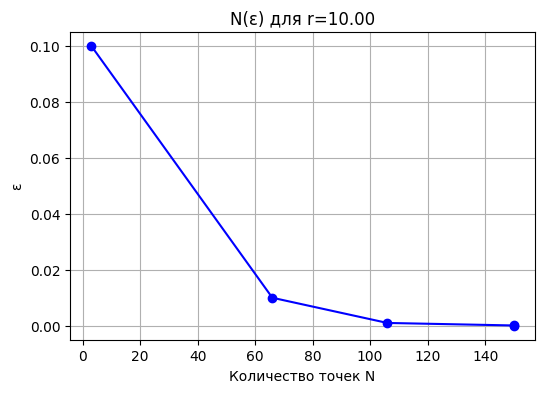


Для радиуса r=5.00:
Необходимо 3 точек для достижения точности 0.10000
Необходимо 4 точек для достижения точности 0.01000
Необходимо 96 точек для достижения точности 0.00100
Необходимо 150 точек для достижения точности 0.00010
Необходимо 150 точек для достижения точности 0.00001


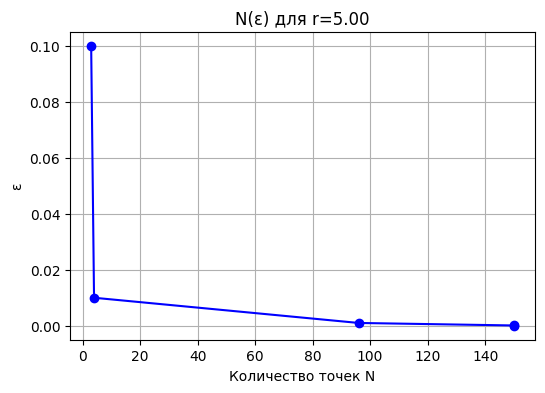


Для радиуса r=3.33:
Необходимо 0 точек для достижения точности 0.10000
Необходимо 21 точек для достижения точности 0.01000
Необходимо 22 точек для достижения точности 0.00100
Необходимо 150 точек для достижения точности 0.00010
Необходимо 150 точек для достижения точности 0.00001


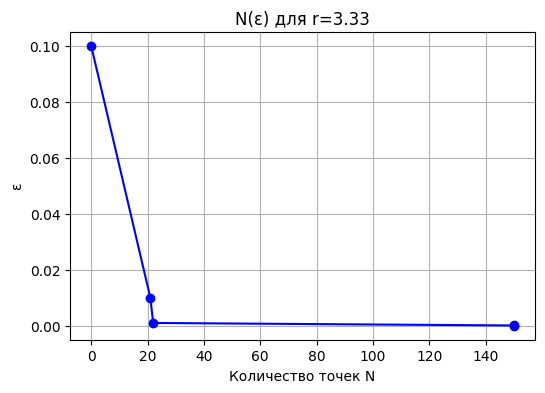


Для радиуса r=2.50:
Необходимо 0 точек для достижения точности 0.10000
Необходимо 16 точек для достижения точности 0.01000
Необходимо 19 точек для достижения точности 0.00100
Необходимо 150 точек для достижения точности 0.00010
Необходимо 150 точек для достижения точности 0.00001


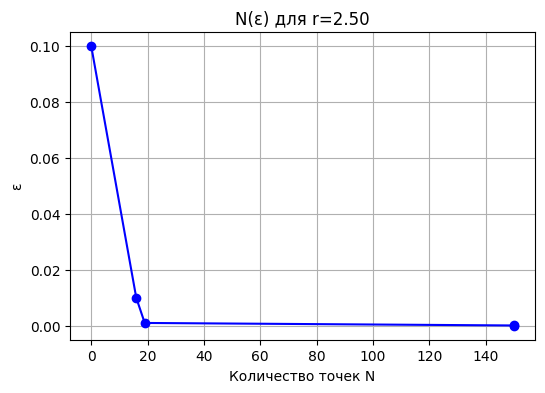


Для радиуса r=2.00:
Необходимо 0 точек для достижения точности 0.10000
Необходимо 24 точек для достижения точности 0.01000
Необходимо 123 точек для достижения точности 0.00100
Необходимо 126 точек для достижения точности 0.00010
Необходимо 150 точек для достижения точности 0.00001


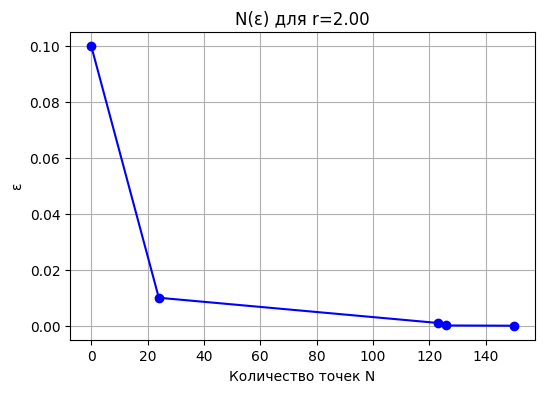

In [15]:
for r in radius:
     true_probability = true_probabilities[r]
     plot_erors(r, true_probability, x_points, y_points, count_points)